## <font color='Red'>MESSY-CLEAN ROOM CLASSIFIER WITH CNN ON AUGMENTED DATASET</font>

### For further information about the notebook and the details about each step, click at the following link https://github.com/Iron486/Clean_messy_room_classification and check the README.md file.

### Import libraries

In [3]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

### Train the model with a CNN with augmented dataset

In [4]:
size=180
TRAINING_DIR = os.path.join('../input/messy-vs-clean-room/images','train')
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=3,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size=40,
                                                   class_mode='binary',
                                                   target_size=(size,size))

VALIDATION_DIR = os.path.join('../input/messy-vs-clean-room/images', 'val')
validation_datagen = ImageDataGenerator(rescale=1/255)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size=40,
                                                             class_mode='binary',
                                                             target_size=(size,size))



Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
tf.random.set_seed(79)

#model = tf.keras.applications.DenseNet169(include_top=True,weights=None,input_shape=(35,35,3),classes=1)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='linear', input_shape=(size,size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3)),#activation='linear'),
    tf.keras.layers.Activation('linear'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),  activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1200, activation='linear'),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(38, activation='linear'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
      ])

opt = keras.optimizers.Adam(learning_rate=0.000004)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=210,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()
#pd.set_option('display.max_rows', 10)

history = model.fit_generator(train_generator,
                              epochs=7000,
                              verbose=1,
                              validation_data=validation_generator,callbacks=[early_stopping_cb])

2022-06-09 13:40:06.183122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 13:40:06.287547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 13:40:06.288451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 13:40:06.289731: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
activation (Activation)      (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0

2022-06-09 13:40:09.491915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7000


2022-06-09 13:40:11.524344: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


5/5 [==============================] - 11s 681ms/step - loss: 0.7021 - accuracy: 0.4948 - val_loss: 0.6961 - val_accuracy: 0.4000
Epoch 2/7000
5/5 [==============================] - 2s 399ms/step - loss: 0.6941 - accuracy: 0.5260 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/7000
5/5 [==============================] - 2s 387ms/step - loss: 0.6962 - accuracy: 0.5052 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 4/7000
5/5 [==============================] - 2s 379ms/step - loss: 0.6835 - accuracy: 0.5469 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 5/7000
5/5 [==============================] - 2s 378ms/step - loss: 0.6936 - accuracy: 0.4896 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 6/7000
5/5 [==============================] - 2s 445ms/step - loss: 0.6859 - accuracy: 0.5156 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 7/7000
5/5 [==============================] - 2s 379ms/step - loss: 0.6881 - accuracy: 0.5104 - val_loss: 0.6809 - val_accuracy: 0.5000
Epoch 8/7000
5/5 [

1/1 [==============================] - 0s 107ms/step - loss: 0.2047 - accuracy: 0.9000
Accuracy: 89.999998


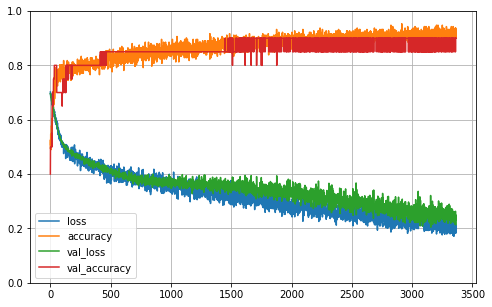

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,1)
#model.save('my_keras_model_aug_180_slowlearn.h5')
plt.savefig('/kaggle/working/CNN_dropout_augmented_dataset.png')
loss, accuracy = model.evaluate(validation_generator)

#print accuracy    
print('Accuracy: %f' % (accuracy*100))

### Details about the model

In [9]:
#model=keras.models.load_model('my_keras_model_aug_180_slowlearn.h5') 

#model.summary()

for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(model.layers[i].get_config())
#info about optimizers
model.optimizer.get_config()      

0 <keras.layers.convolutional.Conv2D object at 0x7fbf41decc10>
     <function linear at 0x7fbf450de560>
1 <keras.layers.pooling.MaxPooling2D object at 0x7fbf41f73750>
   no activation attribute
2 <keras.layers.convolutional.Conv2D object at 0x7fbf41f73d90>
     <function linear at 0x7fbf450de560>
3 <keras.layers.core.Activation object at 0x7fbf41f730d0>
     <function linear at 0x7fbf450de560>
4 <keras.layers.pooling.MaxPooling2D object at 0x7fbfa46f5dd0>
   no activation attribute
5 <keras.layers.convolutional.Conv2D object at 0x7fbf41def0d0>
     <function linear at 0x7fbf450de560>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fbf41dece10>
   no activation attribute
7 <keras.layers.convolutional.Conv2D object at 0x7fbf44108d50>
     <function linear at 0x7fbf450de560>
8 <keras.layers.pooling.MaxPooling2D object at 0x7fbf41f121d0>
   no activation attribute
9 <keras.layers.convolutional.Conv2D object at 0x7fbf41f126d0>
     <function linear at 0x7fbf450de560>
10 <keras.layers.pool

{'name': 'Adam',
 'learning_rate': 4e-06,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

### Show the entire validation dataset

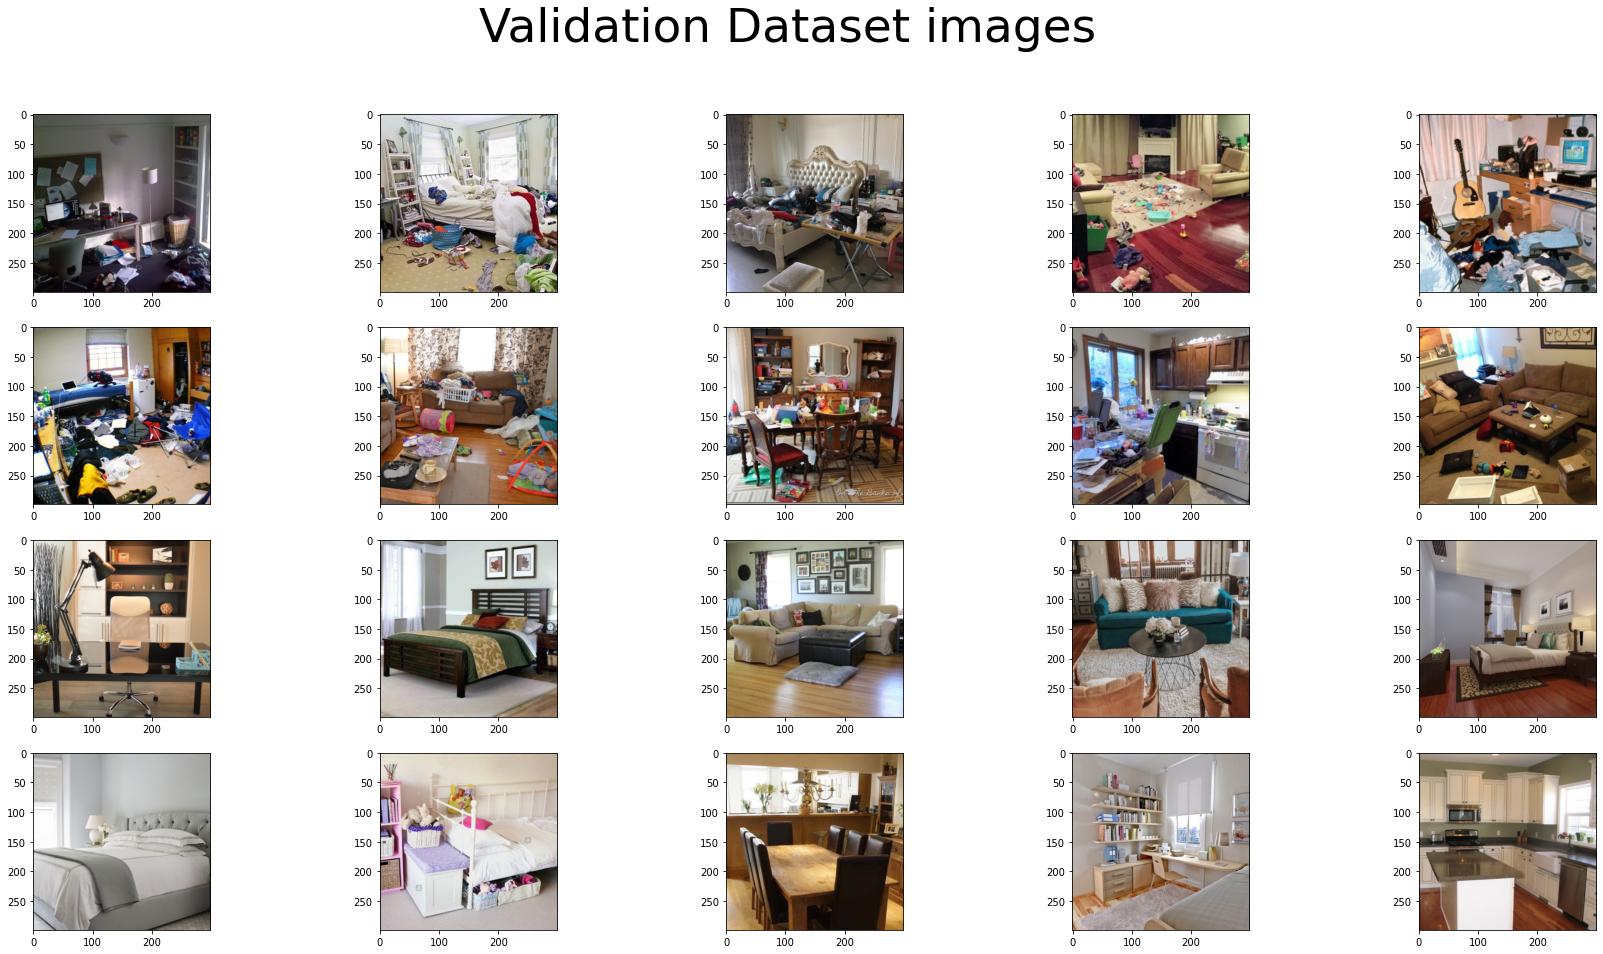

In [10]:
images=[] 
n_classes=2
for i,filenames in enumerate(os.listdir(VALIDATION_DIR)): 
    dir_fold=os.path.join(VALIDATION_DIR, filenames)
    class_images=[]
    for filename in os.listdir(dir_fold):
        img_path = os.path.join(dir_fold, filename)
        class_images.append(mpimg.imread(img_path))
    images.append(class_images)

#valid for balanced classes
columns = 5
fig,axes=plt.subplots(int(len(images)*len(images[0])/columns),columns,figsize=(30,15))
for i,ind in enumerate(images):
    fig.suptitle('Validation Dataset images',fontsize=47)
    for j, image in enumerate(ind):
        axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].imshow(image)

In [ ]:
len(images[0])

### Predict on test dataset

In [21]:
TEST_DIR = '../input/messy-vs-clean-room/images'
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,batch_size=40,
                                                             classes=['test'],
                                                              # don't generate labels
                                                              class_mode=None,
                                                              # don't shuffle
                                                              shuffle=False,
                                                             target_size=(size,size))

Found 10 images belonging to 1 classes.


In [12]:
files=test_generator.filenames
files    

['test/0.png',
 'test/1.png',
 'test/2.png',
 'test/3.png',
 'test/4.png',
 'test/5.png',
 'test/6.png',
 'test/7.png',
 'test/8.png',
 'test/9.png']

In [41]:
#test_generator.reset()
pred=np.rint(model.predict(test_generator))
#pred=np.argmax(pred, axis=-1)
predicted_class_indices=np.array(pred).reshape(len(pred))
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

,Filename,Predictions
0,test/0.png,messy
1,test/1.png,clean
2,test/2.png,messy
3,test/3.png,clean
4,test/4.png,messy
5,test/5.png,messy
6,test/6.png,clean
7,test/7.png,messy
8,test/8.png,messy
9,test/9.png,clean


#### In this notebook, 90% accuracy on validation and 80% on test were reached. 

#### Training the model with my local GPU using the same model, 90% accuracy was reached for both test and validation datasets. Check out below:

#### https://github.com/Iron486/Clean_messy_room_classification/blob/main/CNN_augmented_dataset_with_dropout.ipynb.

In [42]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]